## Install Packages

In [1]:
# This is for Google Colab
!sudo apt-get install graphviz
!pip install graphviz
!pip install pydotplus
!pip install sklearn
!pip install pydot
!pip install pandas

## Import Libraries

In [5]:
import pydotplus
import pandas as pd
import numpy as np
from sklearn import tree
from io import StringIO
import pydot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

## Import Real Dataset

In [16]:
# Question: Load the csv dataset (source: https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
colnames=['x1', 'x2', 'x3', 'y'] 
dataset = pd.read_csv(path,names=colnames, header=None)
print(dataset.shape)
dataset.head()

(306, 4)


,x1,x2,x3,y
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [53]:
# Question: Split the dataset into the training and test sets, 75% for training and 25% for testing
X = dataset.drop('y', axis=1)
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.69, random_state=0)

## Fit Decision Tree

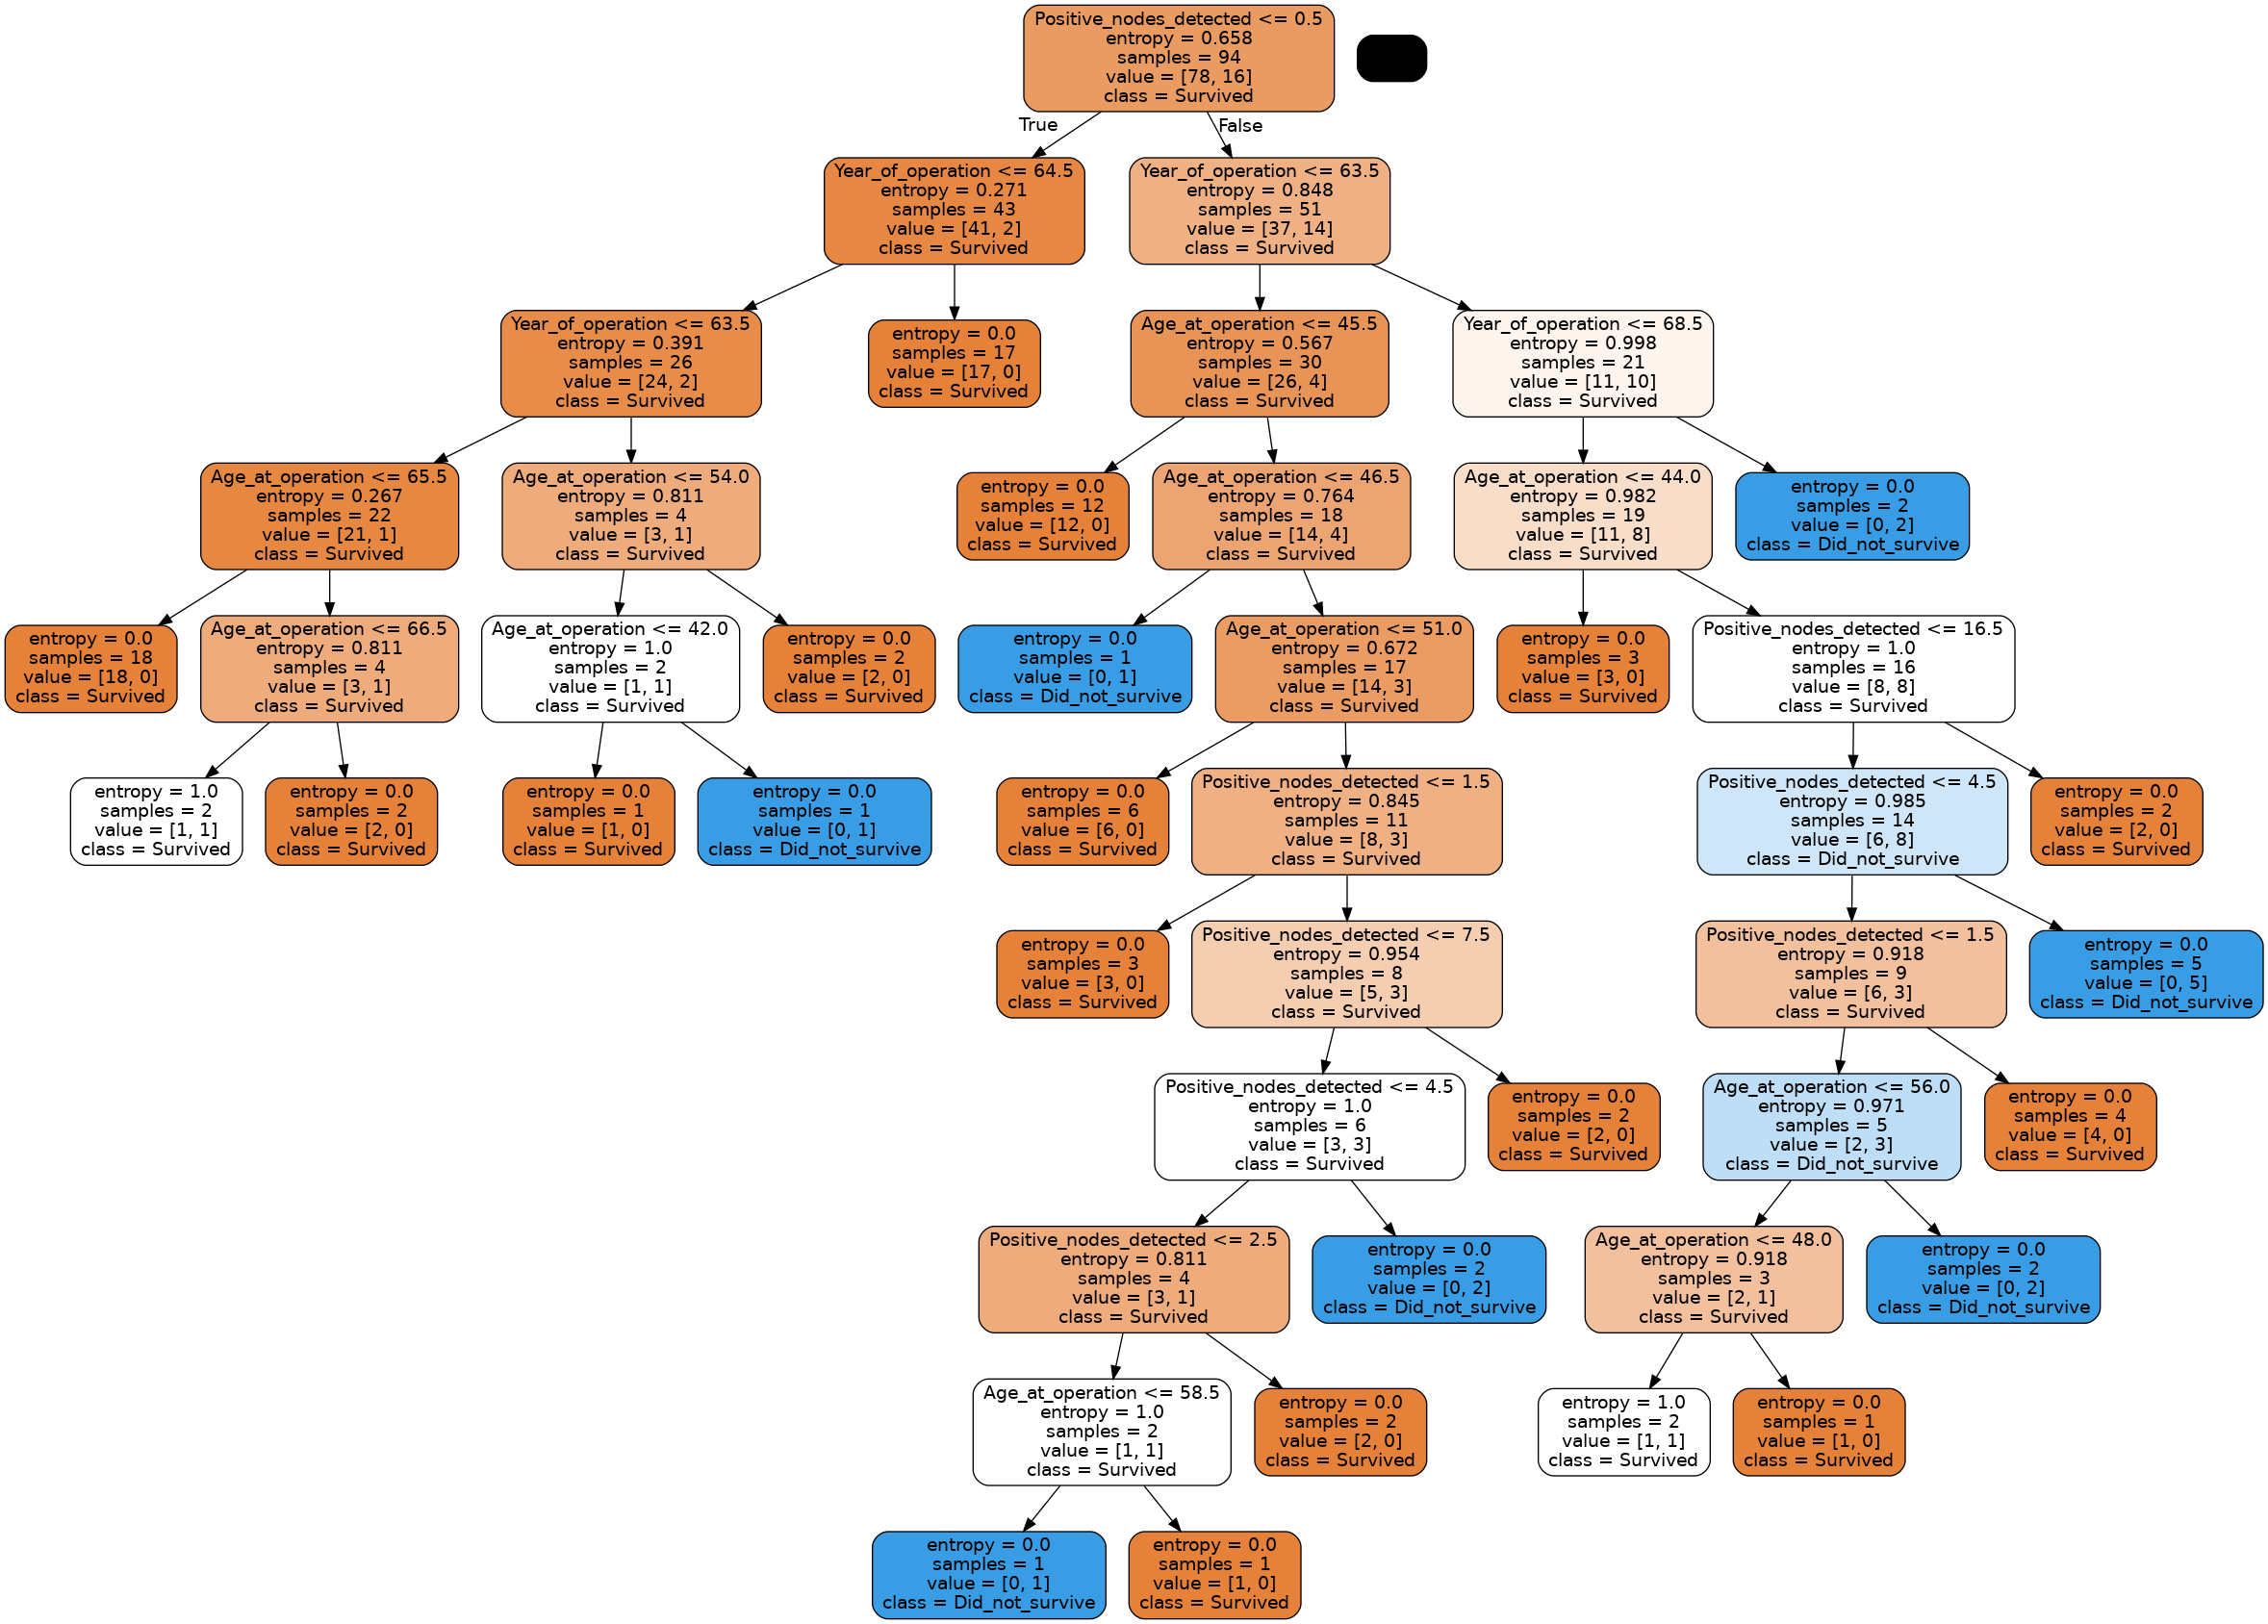

In [60]:
# Question: Fit a decision tree model on the training set, try to adjust the max_depth to compare trees and performance
model = DecisionTreeClassifier(criterion='entropy', max_depth=60)
trained_model = model.fit(X_train, y_train)

# Visualize the tree structure
from IPython.display import Image
out_file = tree.export_graphviz(
         trained_model,
         feature_names = ['Age_at_operation', 'Year_of_operation', 'Positive_nodes_detected'],
         class_names = ['Survived', 'Did_not_survive'],
         filled = True,
         rounded = True
 )
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

## Compute Performance

                 precision    recall  f1-score   support

       Survived       0.71      0.81      0.76       147
Did_not_survive       0.38      0.26      0.31        65

       accuracy                           0.64       212
      macro avg       0.55      0.54      0.53       212
   weighted avg       0.61      0.64      0.62       212



/home/danielheery/anaconda3/envs/AI-Studio/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


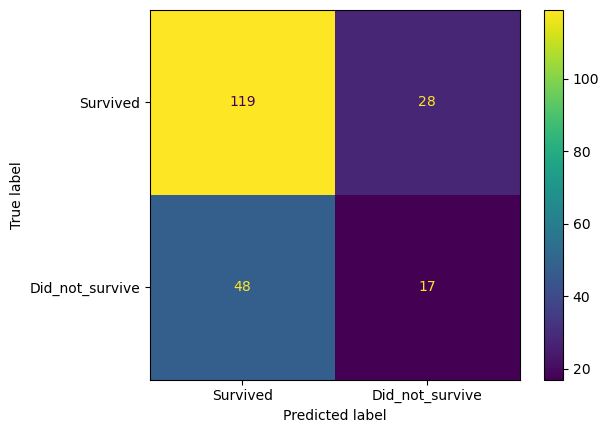

In [59]:
# Make predictions on the test data points
y_pred = trained_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Survived', 'Did_not_survive']))

# Print the confusion matrix
plot_confusion_matrix(trained_model, X_test, y_test, display_labels=['Survived', 'Did_not_survive'])
plt.show()